In [1]:
# !pip install numpy
# !pip install matplotlib
# !pip install pandas
# !pip install scikit-learn
# !pip install stats
# !pip install scipy


In [2]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm 
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [3]:
df = pd.read_csv("~/Documents/job application/Accredian/Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.replace("?",np.nan,inplace=True)
missing_vals = df.isnull()
for val in missing_vals.columns.values.tolist():
    print(missing_vals[val].value_counts())

step
False    6362620
Name: count, dtype: int64
type
False    6362620
Name: count, dtype: int64
amount
False    6362620
Name: count, dtype: int64
nameOrig
False    6362620
Name: count, dtype: int64
oldbalanceOrg
False    6362620
Name: count, dtype: int64
newbalanceOrig
False    6362620
Name: count, dtype: int64
nameDest
False    6362620
Name: count, dtype: int64
oldbalanceDest
False    6362620
Name: count, dtype: int64
newbalanceDest
False    6362620
Name: count, dtype: int64
isFraud
False    6362620
Name: count, dtype: int64
isFlaggedFraud
False    6362620
Name: count, dtype: int64


In [5]:
df.drop_duplicates()
df.shape

(6362620, 11)

In [6]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

# Mean and Variance <a id="2"></a>

In [8]:
def get_mean_and_variance(data_frame):
    
    mean_values = data_frame.mean()
    variance_values = data_frame.var()
    
    result_df = pd.DataFrame({
        'Mean': mean_values,
        'Variance': variance_values
    })
    
    return result_df

In [9]:
get_mean_and_variance(df[["isFlaggedFraud"]])

,Mean,Variance
isFlaggedFraud,0.000003,0.000003


In [10]:
get_mean_and_variance(df[["isFraud"]])

,Mean,Variance
isFraud,0.001291,0.001289


In [11]:
get_mean_and_variance(df[["amount"]])

,Mean,Variance
amount,179861.903549,3.646448e+11


In [12]:
balOrig = abs(df["oldbalanceOrg"]-df["newbalanceOrig"])  # Change in account balance for origin
balDest = abs(df["oldbalanceDest"] - df["newbalanceDest"]) # Change in account balance for Destination
dummy_type = pd.get_dummies(df["type"],dtype=float)
ndf = pd.concat([df,balOrig,balDest,dummy_type],axis=1)
ndf.rename(columns={0:"balOrig",1:"balDest"},inplace=True)
ndf.columns
ndf[["balOrig","balDest",'CASH_IN', 'CASH_OUT', 'DEBIT',
       'PAYMENT', 'TRANSFER']].head()

,balOrig,balDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,9839.64,0.0,0.0,0.0,0.0,1.0,0.0
1,1864.28,0.0,0.0,0.0,0.0,1.0,0.0
2,181.00,0.0,0.0,0.0,0.0,0.0,1.0
3,181.00,21182.0,0.0,1.0,0.0,0.0,0.0
4,11668.14,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
get_mean_and_variance(ndf[["balOrig"]])

,Mean,Variance
balOrig,53065.995727,1.913899e+10


In [14]:
get_mean_and_variance(ndf[["balDest"]])

,Mean,Variance
balDest,185896.246641,6.417617e+11


In [15]:
get_mean_and_variance(ndf[["CASH_IN"]])


,Mean,Variance
CASH_IN,0.219923,0.171557


In [16]:
get_mean_and_variance(ndf[["CASH_OUT"]])

,Mean,Variance
CASH_OUT,0.351663,0.227996


In [17]:
get_mean_and_variance(ndf[["DEBIT"]])

,Mean,Variance
DEBIT,0.006512,0.006469


In [18]:
get_mean_and_variance(ndf[["PAYMENT"]])

,Mean,Variance
PAYMENT,0.338146,0.223803


In [19]:
get_mean_and_variance(ndf[["TRANSFER"]])

,Mean,Variance
TRANSFER,0.083756,0.076741


In [20]:
ndf.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
balOrig           float64
balDest           float64
CASH_IN           float64
CASH_OUT          float64
DEBIT             float64
PAYMENT           float64
TRANSFER          float64
dtype: object

In [21]:
ndf.columns 

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'balOrig', 'balDest', 'CASH_IN', 'CASH_OUT', 'DEBIT',
       'PAYMENT', 'TRANSFER'],
      dtype='object')

In [22]:
fdf = ndf[["amount","balOrig","balDest","isFlaggedFraud","CASH_IN","CASH_OUT","DEBIT","PAYMENT","TRANSFER"]]
fdf.head()

,amount,balOrig,balDest,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,9839.64,9839.64,0.0,0,0.0,0.0,0.0,1.0,0.0
1,1864.28,1864.28,0.0,0,0.0,0.0,0.0,1.0,0.0
2,181.00,181.00,0.0,0,0.0,0.0,0.0,0.0,1.0
3,181.00,181.00,21182.0,0,0.0,1.0,0.0,0.0,0.0
4,11668.14,11668.14,0.0,0,0.0,0.0,0.0,1.0,0.0


In [23]:
fdf.corr()

,amount,balOrig,balDest,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
amount,1.000000,0.183005,0.867654,0.012295,-0.009621,-0.004376,-0.023379,-0.197444,0.365896
balOrig,0.183005,1.000000,0.078325,-0.000608,0.444631,-0.130515,-0.029015,-0.241217,-0.019478
balDest,0.867654,0.078325,1.000000,-0.000368,-0.023510,0.011484,-0.015852,-0.165865,0.303212
isFlaggedFraud,0.012295,-0.000608,-0.000368,1.000000,-0.000842,-0.001168,-0.000128,-0.001133,0.005245
CASH_IN,-0.009621,0.444631,-0.023510,-0.000842,1.000000,-0.391047,-0.042987,-0.379522,-0.160535
CASH_OUT,-0.004376,-0.130515,0.011484,-0.001168,-0.391047,1.000000,-0.059625,-0.526422,-0.222672
DEBIT,-0.023379,-0.029015,-0.015852,-0.000128,-0.042987,-0.059625,1.000000,-0.057868,-0.024478
PAYMENT,-0.197444,-0.241217,-0.165865,-0.001133,-0.379522,-0.526422,-0.057868,1.000000,-0.216110
TRANSFER,0.365896,-0.019478,0.303212,0.005245,-0.160535,-0.222672,-0.024478,-0.216110,1.000000


In [24]:
fraud = pd.concat([fdf,df["isFraud"]],axis=1)
fraud.head()


,amount,balOrig,balDest,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,isFraud
0,9839.64,9839.64,0.0,0,0.0,0.0,0.0,1.0,0.0,0
1,1864.28,1864.28,0.0,0,0.0,0.0,0.0,1.0,0.0,0
2,181.00,181.00,0.0,0,0.0,0.0,0.0,0.0,1.0,1
3,181.00,181.00,21182.0,0,0.0,1.0,0.0,0.0,0.0,1
4,11668.14,11668.14,0.0,0,0.0,0.0,0.0,1.0,0.0,0


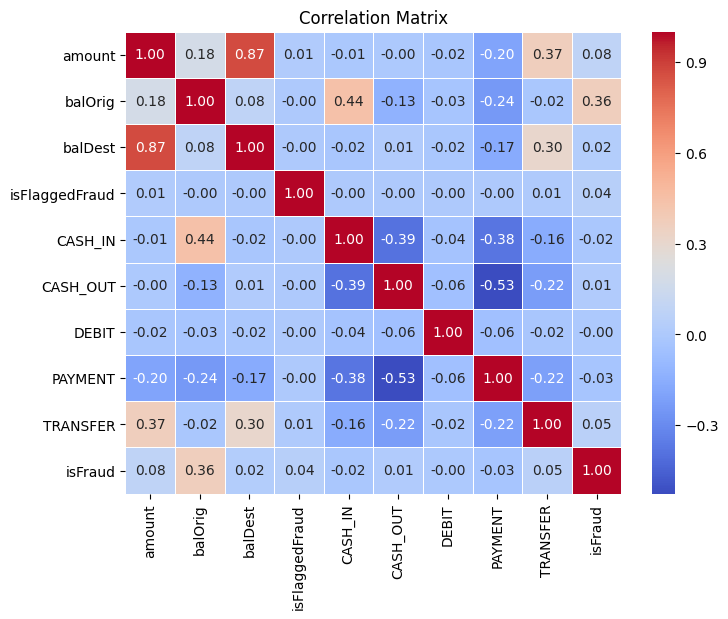

In [25]:
correlation_matrix = fraud.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# Feature Selection <a id="2"></a>

In [26]:
X = np.asarray(fdf[["amount","balOrig","balDest","isFlaggedFraud","CASH_IN","CASH_OUT","DEBIT","PAYMENT","TRANSFER"]])
X[0:5]

array([[9.839640e+03, 9.839640e+03, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00],
       [1.864280e+03, 1.864280e+03, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00],
       [1.810000e+02, 1.810000e+02, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00],
       [1.810000e+02, 1.810000e+02, 2.118200e+04, 0.000000e+00,
        0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00],
       [1.166814e+04, 1.166814e+04, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00]])

In [27]:
y = np.asarray(df["isFraud"])

In [28]:
chi2_selector = SelectKBest(chi2, k=6)
x = chi2_selector.fit_transform(X, y)
selected_feature_indices = chi2_selector.get_support(indices=True)
selected_feature_indices

array([0, 1, 2, 3, 7, 8])

In [29]:

x_new = fdf[["amount","balOrig","balDest","isFlaggedFraud", "TRANSFER"]]
x_new[0:5]

,amount,balOrig,balDest,isFlaggedFraud,TRANSFER
0,9839.64,9839.64,0.0,0,0.0
1,1864.28,1864.28,0.0,0,0.0
2,181.00,181.00,0.0,0,1.0
3,181.00,181.00,21182.0,0,0.0
4,11668.14,11668.14,0.0,0,0.0


In [30]:
x = preprocessing.StandardScaler().fit(x_new).transform(x_new)
x[0:5]

array([[-2.81559923e-01, -3.12456201e-01, -2.32051165e-01,
        -1.58577857e-03, -3.02345156e-01],
       [-2.94767262e-01, -3.70105074e-01, -2.32051165e-01,
        -1.58577857e-03, -3.02345156e-01],
       [-2.97554804e-01, -3.82272449e-01, -2.32051165e-01,
        -1.58577857e-03,  3.30747816e+00],
       [-2.97554804e-01, -3.82272449e-01, -2.05610030e-01,
        -1.58577857e-03, -3.02345156e-01],
       [-2.78531894e-01, -2.99239122e-01, -2.32051165e-01,
        -1.58577857e-03, -3.02345156e-01]])

In [31]:
x_train, x_test, y_train,y_test = train_test_split(x,y,random_state=2,test_size=0.15)
print("Train set: ", x_train.shape, y_train.shape)
print("Test Set: ", x_test.shape,y_test.shape)

Train set:  (5408227, 5) (5408227,)
Test Set:  (954393, 5) (954393,)


# Logistic Regression <a id="2"></a>

In [32]:
lr_linear = LogisticRegression(C=0.02,solver="liblinear").fit(x_train,y_train)
lr_linear

LogisticRegression(C=0.02, solver='liblinear')

In [33]:
yhat = lr_linear.predict(x_test)
yhat_prob = lr_linear.predict_proba(x_test)
print(yhat_prob)

[[9.99645470e-01 3.54530263e-04]
 [9.99053654e-01 9.46345500e-04]
 [9.99881233e-01 1.18767471e-04]
 ...
 [9.99515497e-01 4.84502762e-04]
 [9.99763743e-01 2.36256701e-04]
 [9.99635057e-01 3.64943311e-04]]


# Evaluation of Logistic Regression <a> <a>

In [37]:
from sklearn.metrics import accuracy_score, jaccard_score, f1_score
LogReg_Accuracy_Score = accuracy_score(y_test,yhat)
LogReg_JaccardIndex = jaccard_score(y_test,yhat)
LogReg_F1_Score = f1_score(y_test,yhat)
LogReg_log_loss = log_loss(y_test,yhat_prob)
print("Logistic Regression Accuracy Score:", LogReg_Accuracy_Score)
print("Logistic Regression Jaccard Index:", LogReg_JaccardIndex)
print("Logistic Regression F1 Score:", LogReg_F1_Score)
print("Logistic Regression Log Loss:",LogReg_log_loss)

Logistic Regression Accuracy Score: 0.9991334806521004
Logistic Regression Jaccard Index: 0.34103585657370517
Logistic Regression F1 Score: 0.5086155674390969
Logistic Regression Log Loss: 0.004901658193920683


In [39]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[   428    776]
 [    51 953138]]


Confusion matrix, without normalization
[[   428    776]
 [    51 953138]]


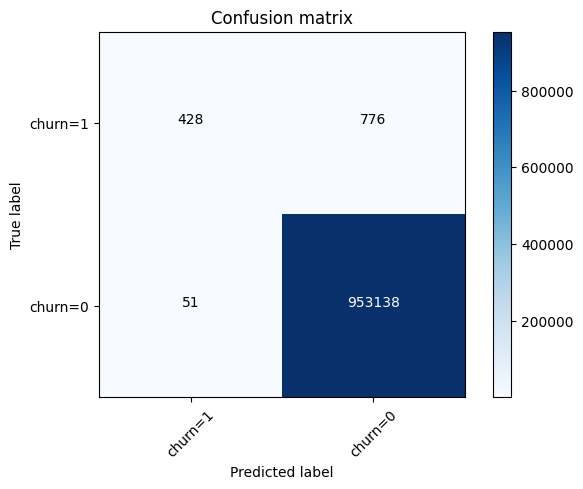

In [40]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [41]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    953189
           1       0.89      0.36      0.51      1204

    accuracy                           1.00    954393
   macro avg       0.95      0.68      0.75    954393
weighted avg       1.00      1.00      1.00    954393



In [42]:
t_statistic, p_value = ttest_ind(y_test, yhat)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 17.681651668937494
P-value: 5.8822756547458e-70


# Decision Tree <a id="3"></a>

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [44]:
yhat_dt = dt.predict(x_test)
from sklearn import metrics

In [45]:
Tree_Accuracy_Score = accuracy_score(y_test,yhat_dt)
Tree_JaccardIndex = jaccard_score(y_test,yhat_dt)
Tree_F1_Score = f1_score(y_test,yhat_dt)

print("Decision Tree Accuracy Score:", Tree_Accuracy_Score)
print("Decision Tree Jaccard Index:", Tree_JaccardIndex)
print("Decision Tree F1 Score:", Tree_F1_Score)

Decision Tree Accuracy Score: 0.9990653745364855
Decision Tree Jaccard Index: 0.469678953626635
Decision Tree F1 Score: 0.63915857605178


In [46]:
t_statistic, p_value = ttest_ind(y_test, yhat_dt)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -1.288062996003226
P-value: 0.19772419126049345


# K Nearest Neighbour <a> <a> 

In [47]:
k =4
neigh = KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)

In [48]:
yhat_knn = neigh.predict(x_test)
yhat_knn[0:5]

array([0, 0, 0, 0, 0])

In [49]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_knn))


Train set Accuracy:  0.9995421789802832
Test set Accuracy:  0.9995012536764205


In [50]:

t_statistic, p_value = ttest_ind(y_test, yhat_knn)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 8.345742418225292
P-value: 7.08141603984079e-17


In [51]:
KNN_Accuracy_Score = accuracy_score(y_test,yhat_knn)
KNN_JaccardIndex = jaccard_score(y_test,yhat_knn)
KNN_F1_Score = f1_score(y_test,yhat_knn)
print("KNN Accuracy Score:", KNN_Accuracy_Score)
print("KNN Jaccard Index:", KNN_JaccardIndex)
print("KNN F1 Score:", KNN_F1_Score)

KNN Accuracy Score: 0.9995012536764205
KNN Jaccard Index: 0.620414673046252
KNN F1 Score: 0.7657480314960631


# Support Vector Machine <a> <a>

In [52]:
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(x_train, y_train) 


In [ ]:
yhat_rbf = svm_rbf.predict(x_test)
print (classification_report(y_test, yhat_rbf))


In [ ]:

t_statistic, p_value = ttest_ind(y_test, yhat_rbf)

print("T-statistic:", t_statistic)
print("P-value:", p_value)


In [ ]:
SVM_Accuracy_Score = accuracy_score(y_test,yhat_rbf)
SVM_JaccardIndex = jaccard_score(y_test,yhat_rbf)
SVM_F1_Score = f1_score(y_test,yhat_rbf)
print("SVM rbf Accuracy Score:", SVM_Accuracy_Score)
print("SVM rbf Jaccard Index:", SVM_JaccardIndex)
print("SVM rbf F1 Score:", SVM_F1_Score)


SVM using Sigmoid 

In [ ]:

svm_sig = svm.SVC(kernel='sigmoid')
svm_sig.fit(x_train, y_train) 
yhat_sig = svm_sig.predict(x_test)
print (classification_report(y_test, yhat_sig))


In [ ]:

t_statistic, p_value = ttest_ind(y_test, yhat_sig)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

In [ ]:
SVM_Sig_Accuracy_Score = accuracy_score(y_test,yhat_sig)
SVM_Sig_JaccardIndex = jaccard_score(y_test,yhat_sig)
SVM_Sig_F1_Score = f1_score(y_test,yhat_sig)
print("SVM Sigmoid Accuracy Score:", SVM_Sig_Accuracy_Score)
print("SVM Sigmoid Jaccard Index:", SVM_Sig_JaccardIndex)
print("SVM Sigmoid F1 Score:", SVM_SigF1_Score)